/opt/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 30 (9.70873786407767%)


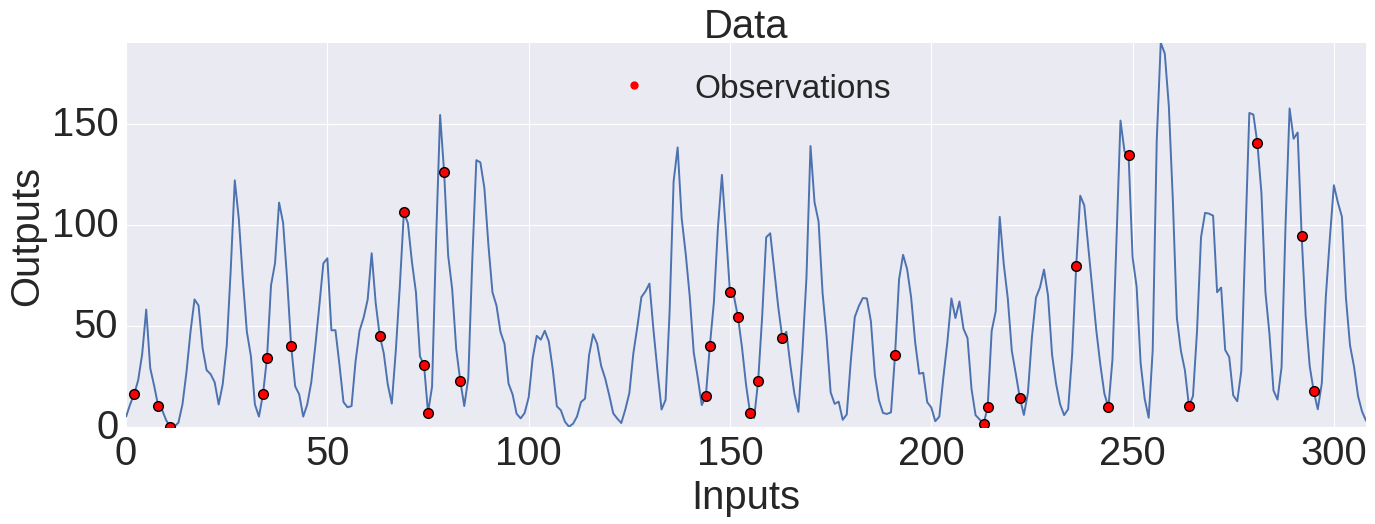

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import g3py as g3
import theano as th

th.config.warn_float64 = 'raise'

g3.style_big_seaborn()
g3.style_widget()

x, y = g3.data_sunspots()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.1)

'Starting function value (-logp): 153.482'
'start_bfgs'
Optimization terminated successfully.
         Current function value: 153.481918
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
'start_powell'
Optimization terminated successfully.
         Current function value: 153.481918
         Iterations: 1
         Function evaluations: 46
'find_MAP'
{'GP_Bias_Bias': 41.663334,
 'GP_KernelNoise_var_log_': array(7.394250869750977, dtype=float32)}


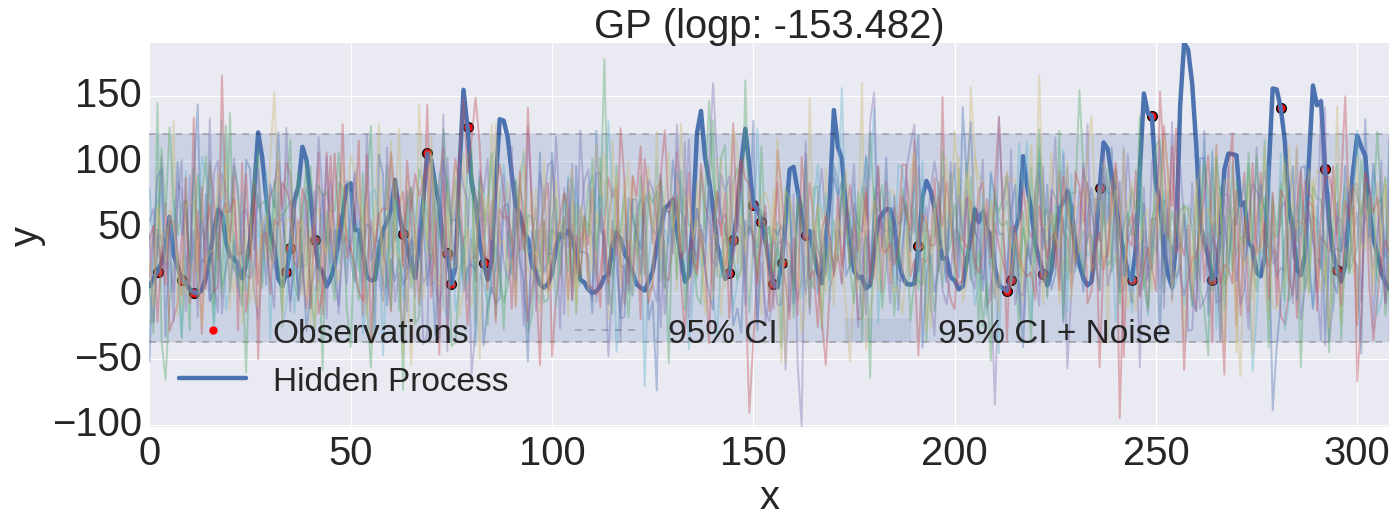

In [25]:
gp = g3.GaussianProcess(space=x, location=g3.Bias(x), kernel=g3.KernelNoise(x), hidden = y, noisy=False)
gp.observed(x_obs, y_obs)
p = gp.find_MAP(points=2)
gp.plot(p, quantiles_noise=True, median=False, mean=False, samples=10, prior=False, logp=True)

'Starting function value (-logp): 153.513'
'start_bfgs'
         Current function value: 153.481918
         Iterations: 4
         Function evaluations: 75
         Gradient evaluations: 63
'start_powell'
Optimization terminated successfully.
         Current function value: 153.481918
         Iterations: 2
         Function evaluations: 90
'find_MAP'
{'TGP_scale_Bias': array(40.332820892333984, dtype=float32),
 'TGP_shift_Bias': array(41.663333892822266, dtype=float32)}


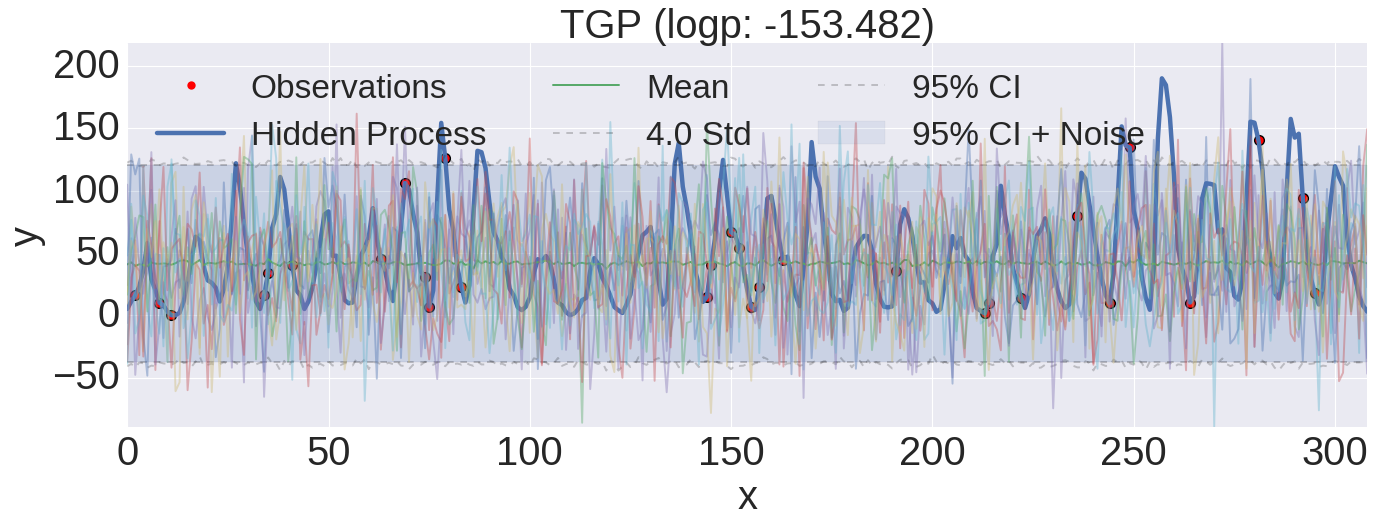

In [26]:
transport = g3.TLocation(g3.Bias(x, name='shift')) @ g3.TScale(g3.Bias(x, name='scale'))
tgp = g3.TransportGaussianProcess(space=x, transport=transport, hidden = y)
tgp.observed(x_obs, y_obs)
tp = tgp.find_MAP(points=2)
tgp.plot(tp, quantiles_noise=True, median=False, mean=True, std=True, samples=10, prior=False, logp=True)

In [27]:
gp.logp(p)

array(-153.48191833496094, dtype=float32)

In [28]:
tgp.logp(tp)

array(-153.48191833496094, dtype=float32)

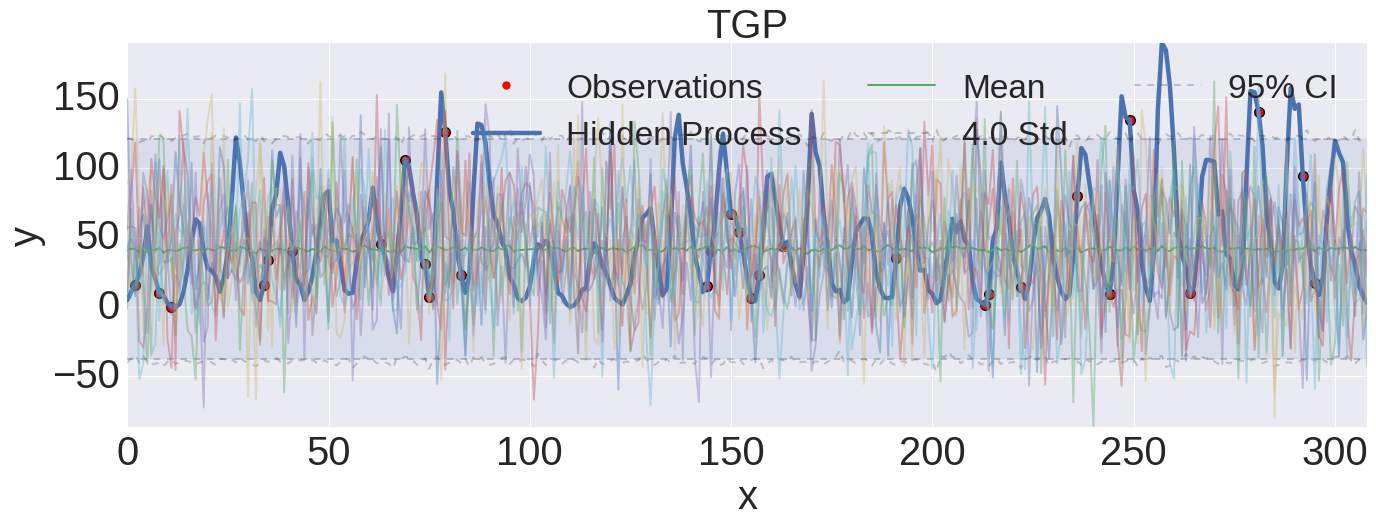

In [29]:
tgp.plot(tp, quantiles_noise=False, median=False, mean=True, std=True, samples=10, simulations=1000)

'Starting function value (-logp): 154.708'
'start_bfgs'
         Current function value: 151.627304
         Iterations: 32
         Function evaluations: 118
         Gradient evaluations: 106
'start_powell'
Optimization terminated successfully.
         Current function value: 151.628723
         Iterations: 9
         Function evaluations: 490
'find_MAP'
{'GP_Bias_Bias': array(33.87189483642578, dtype=float32),
 'GP_Noise_var_log_': array(4.466033458709717, dtype=float32),
 'GP_SE_rate_log_': array([-1.15278554], dtype=float32),
 'GP_SE_var_log_': array(7.6339263916015625, dtype=float32)}


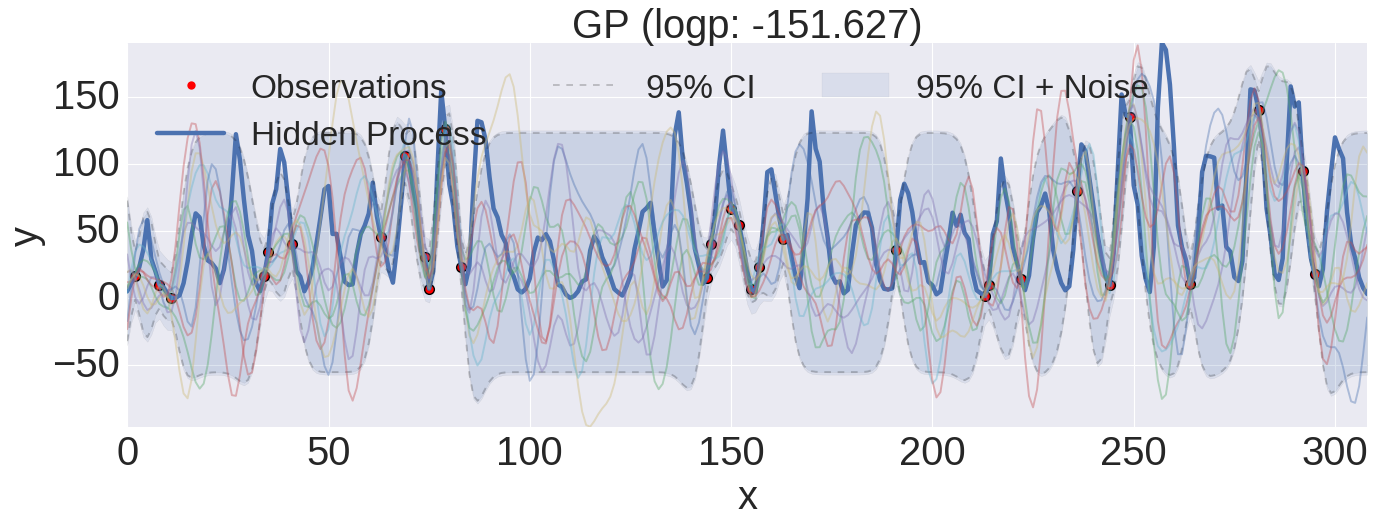

In [30]:
gp = g3.GaussianProcess(space=x, location=g3.Bias(x), kernel=g3.SE(x), hidden = y, noisy=True)
gp.observed(x_obs, y_obs)
p = gp.find_MAP(points=2)
gp.plot(p, quantiles_noise=True, median=False, mean=False, samples=10, prior=False, logp=True)

'Starting function value (-logp): 154.708'
'start_bfgs'
         Current function value: 151.627304
         Iterations: 32
         Function evaluations: 129
         Gradient evaluations: 117
'start_powell'
Optimization terminated successfully.
         Current function value: 151.628723
         Iterations: 9
         Function evaluations: 490
'find_MAP'
{'TGP_Bias_Bias': array(33.8712158203125, dtype=float32),
 'TGP_KernelNoise_var_log_': array(4.465804100036621, dtype=float32),
 'TGP_SE_rate_log_': array([-1.15284109], dtype=float32),
 'TGP_SE_var_log_': array(7.633934497833252, dtype=float32)}


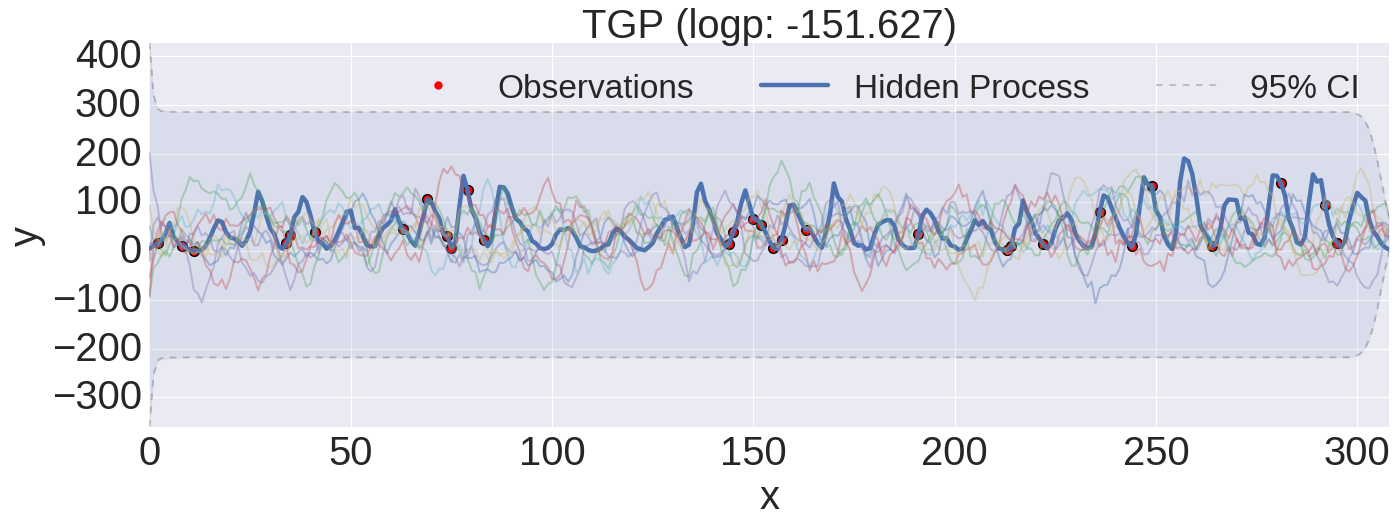

In [33]:
transport = g3.TLocation(g3.Bias(x)) @ g3.TKernel(g3.SE(x) + g3.KernelNoise(x))
tgp = g3.TransportGaussianProcess(space=x, transport=transport, hidden=y)
tgp.observed(x_obs, y_obs)
tp = tgp.find_MAP(points=2)
tgp.plot(tp, quantiles_noise=False, median=False, mean=False, samples=10, logp=True)

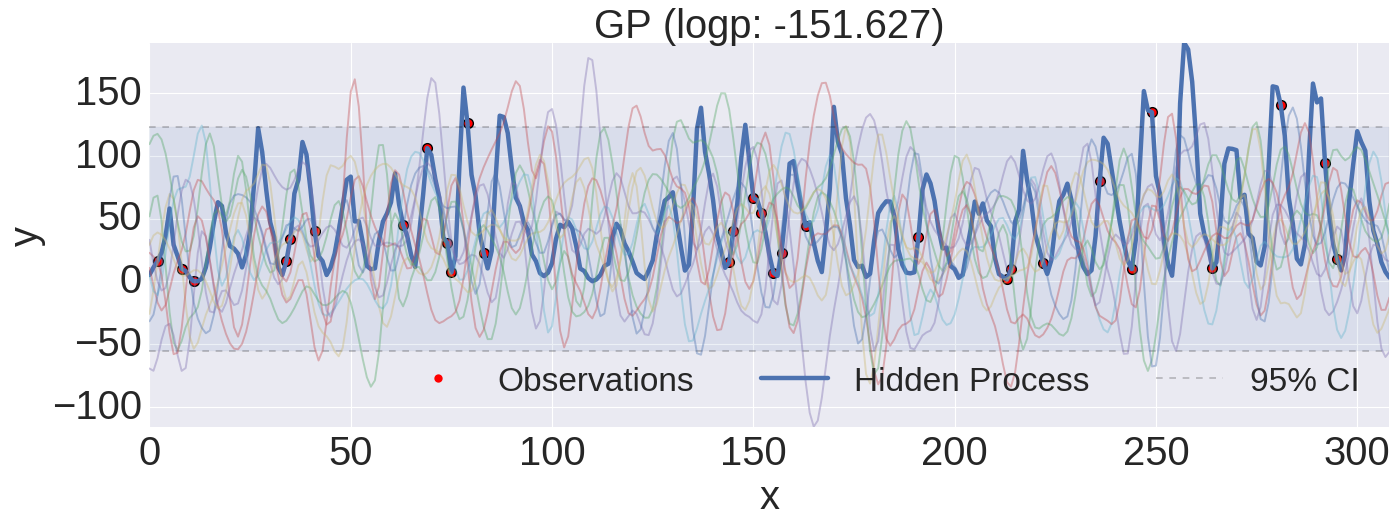

In [49]:
gp.plot(p, quantiles=True, quantiles_noise=False, median=False, 
        mean=False, samples=10, prior=True, logp=True)

In [38]:
tp.TGP_KernelNoise_var_log_ = -6.8
tp

{'TGP_Bias_Bias': array(33.8712158203125, dtype=float32),
 'TGP_KernelNoise_var_log_': -6.8,
 'TGP_SE_rate_log_': array([-1.15284109], dtype=float32),
 'TGP_SE_var_log_': array(7.633934497833252, dtype=float32)}

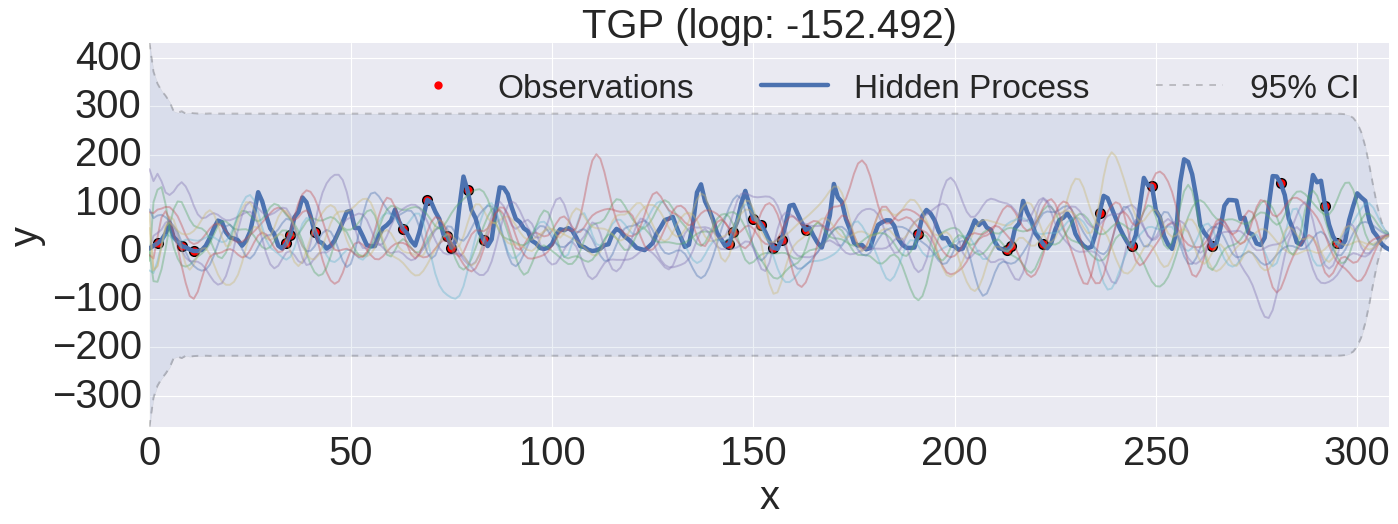

In [48]:
tgp.plot(tp, quantiles=True, quantiles_noise=False, median=False, 
         mean=False, std=False, samples=10, prior=True, logp=True)

In [57]:
mp = gp.mean(p, prior=True)

In [ ]:
mtp = tgp.mean(tp, simulations=100)

In [ ]:
g3.plot(mp)
g3.plot(mtp)

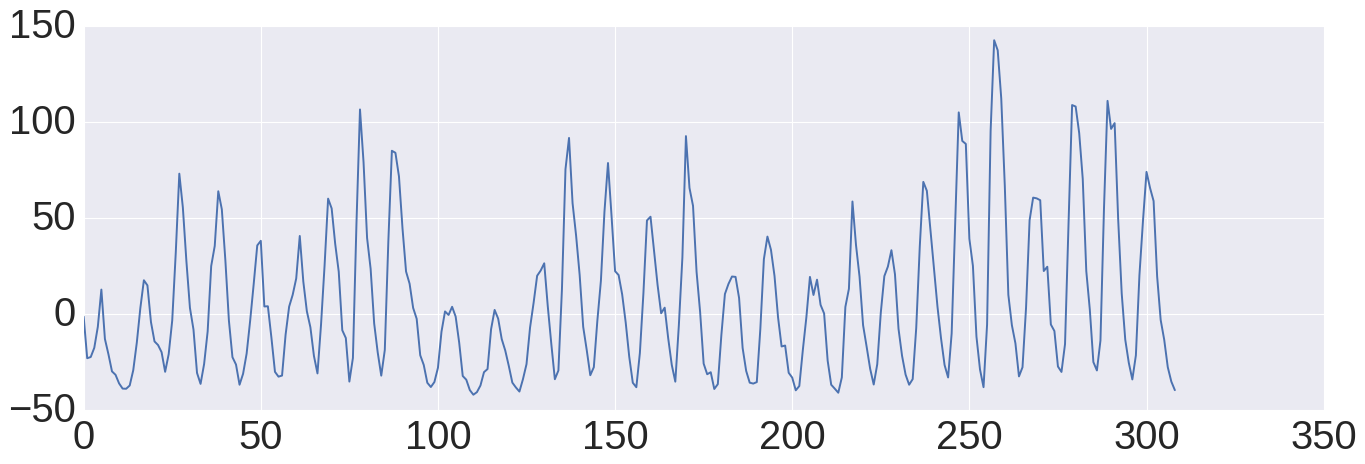

In [117]:
g3.plot(tgp.transport_inv(tp, vector=tgp.hidden))

In [118]:
tp

{'TGP_Bias_Bias': array(43.48363494873047, dtype=float32),
 'TGP_KernelNoise_var_log_': 0.0,
 'TGP_SE_rate_log_': array([-5.76492453], dtype=float32),
 'TGP_SE_var_log_': array(6.893118858337402, dtype=float32)}

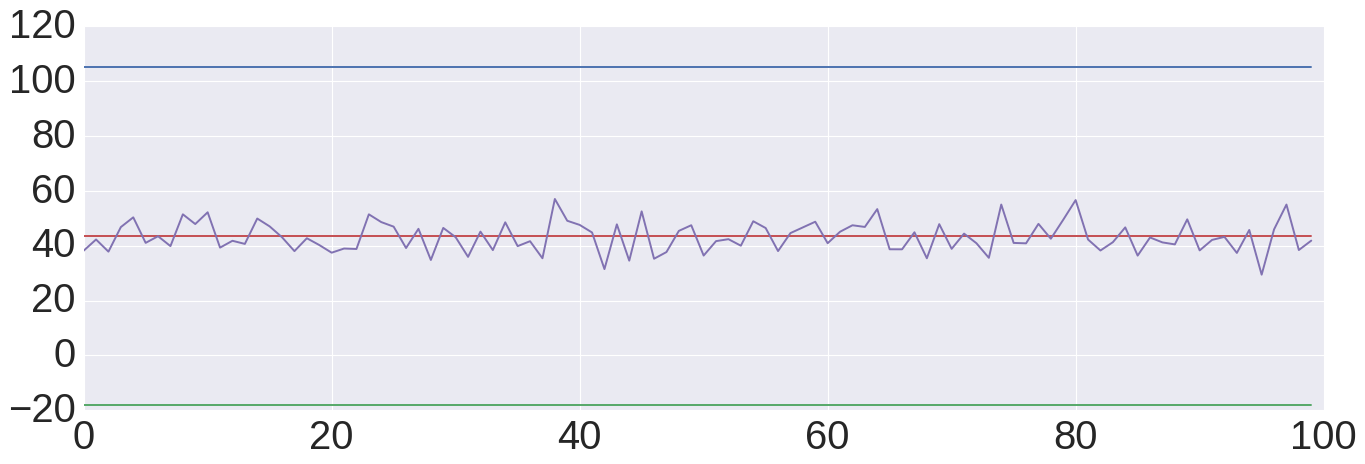

In [119]:
space = tgp.space[:100]
ei = np.ones(len(space))* 1.96


g3.plot(tgp.transport(tp, space=space, vector=ei))
g3.plot(tgp.transport(tp, space=space, vector=-ei))
g3.plot(tgp.median(tp, space=space, vector=ei*0))
g3.plot(tgp.mean(tp, space=space, simulations=33))

In [75]:
tgp.plot(tp, median=True, simulations=100)

ValueError: Shape mismatch: A.shape[1] != x.shape[0]
Apply node that caused the error: CGemv{inplace}(Alloc.0, TensorConstant{1.0}, InplaceDimShuffle{1,0}.0, TGP_vector_th, TGP_Bias_Bias)
Toposort index: 31
Inputs types: [TensorType(float32, vector), TensorType(float32, scalar), TensorType(float32, matrix), TensorType(float32, vector), TensorType(float32, scalar)]
Inputs shapes: [(309,), (), (309, 309), (0,), ()]
Inputs strides: [(4,), (), (1236, 4), (4,), ()]
Inputs values: ['not shown', array(1.0, dtype=float32), 'not shown', array([], dtype=float32), array(43.48363494873047, dtype=float32)]
Outputs clients: [['output']]

HINT: Re-running with most Theano optimization disabled could give you a back-trace of when this node was created. This can be done with by setting the Theano flag 'optimizer=fast_compile'. If that does not work, Theano optimizations can be disabled with 'optimizer=None'.
HINT: Use the Theano flag 'exception_verbosity=high' for a debugprint and storage map footprint of this apply node.

In [76]:
tgp.mean(tp, space=space)

array([ 66.06958008,  42.90645218,  49.70285034,  67.66442108,
        53.09201813,  49.44725037,  47.2093544 ,  46.46408844,
        46.57402802,  69.2615509 ,  47.2181282 ,  44.96095276,
        54.00871658,  62.93856812,  27.13879967,  46.62755203,
        56.23255539,  53.09504318,  55.15345001,  47.45490265,
        46.0709343 ,  29.90731239,  42.68210602,  38.53404236,
        45.1459198 ,  47.81381226,  37.46048355,  43.11497498,
        35.3391304 ,  44.55721664,  36.95245361,  36.85321808,
        45.02616882,  44.6392746 ,  20.56848717,  44.71689987,
        51.71958542,  44.37748337,  26.78380775,  39.40636444,
        34.68387604,  68.96409607,  30.4513588 ,  36.38672638,
        37.98589706,  39.96502686,  39.21985626,  56.37690353,
        45.30223465,  41.87020111,  36.5663147 ,  44.6133728 ,
        43.27581024,  41.25855637,  48.22160721,  49.76170731,
        51.00701141,  37.358078  ,  37.24149323,  43.89176559,
        46.44910049,  50.47536469,  32.86051178,  45.61

In [77]:
tgp.median(tp, space=space, vector=ei*0)

array([ 43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48363495,
        43.48363495,  43.48363495,  43.48363495,  43.48

In [78]:
tgp.transport(tp, space=space, vector=ei)

array([ 4464.0234375 ,  2518.9675293 ,  1776.49023438,  1380.37426758,
        1133.58837891,   965.06420898,   842.73242188,   749.96057129,
         677.25079346,   618.78118896,   570.78271484,   530.70684814,
         496.76824951,   467.67883301,   442.48574829,   420.46893311,
         401.07403564,   383.86730957,   368.5045166 ,   354.70889282,
         342.25537109,   330.95910645,   320.66680908,   311.25021362,
         302.60137939,   294.62854004,   287.25341797,   280.40866089,
         274.03613281,   268.08532715,   262.51208496,   257.27780151,
         252.34854126,   247.69415283,   243.28805542,   239.1065979 ,
         235.12863159,   231.33532715,   227.7097168 ,   224.2366333 ,
         220.90240479,   217.69464111,   214.60223389,   211.6151123 ,
         208.72415161,   205.92111206,   203.19842529,   200.54934692,
         197.96768188,   195.44784546,   192.98471069,   190.57369995,
         188.21060181,   185.89163208,   183.61334229,   181.37261963,
      

In [81]:
import scipy as sp
cho = sp.linalg.cholesky(gp.kernel(p, prior=True)+np.eye(len(gp.mean(p)))*0.01)

In [84]:
gp.kernel(p, prior=True)

array([[ 985.93457031,  985.92974854,  985.91516113, ...,  622.20172119,
         620.32952881,  618.45684814],
       [ 985.92974854,  985.93457031,  985.92974854, ...,  624.07348633,
         622.20172119,  620.32952881],
       [ 985.91516113,  985.92974854,  985.93457031, ...,  625.94476318,
         624.07348633,  622.20172119],
       ..., 
       [ 622.20172119,  624.07348633,  625.94476318, ...,  985.93457031,
         985.92974854,  985.91516113],
       [ 620.32952881,  622.20172119,  624.07348633, ...,  985.92974854,
         985.93457031,  985.92974854],
       [ 618.45684814,  620.32952881,  622.20172119, ...,  985.91516113,
         985.92974854,  985.93457031]], dtype=float32)

In [82]:
cho.T.dot(cho)

array([[ 985.94457031,  985.92974854,  985.91516113, ...,  622.20172119,
         620.32952881,  618.45684814],
       [ 985.92974854,  985.94457031,  985.92974854, ...,  624.07348633,
         622.20172119,  620.32952881],
       [ 985.91516113,  985.92974854,  985.94457031, ...,  625.94476318,
         624.07348633,  622.20172119],
       ..., 
       [ 622.20172119,  624.07348633,  625.94476318, ...,  985.94457031,
         985.92974854,  985.91516113],
       [ 620.32952881,  622.20172119,  624.07348633, ...,  985.92974854,
         985.94457031,  985.92974854],
       [ 618.45684814,  620.32952881,  622.20172119, ...,  985.91516113,
         985.92974854,  985.94457031]])

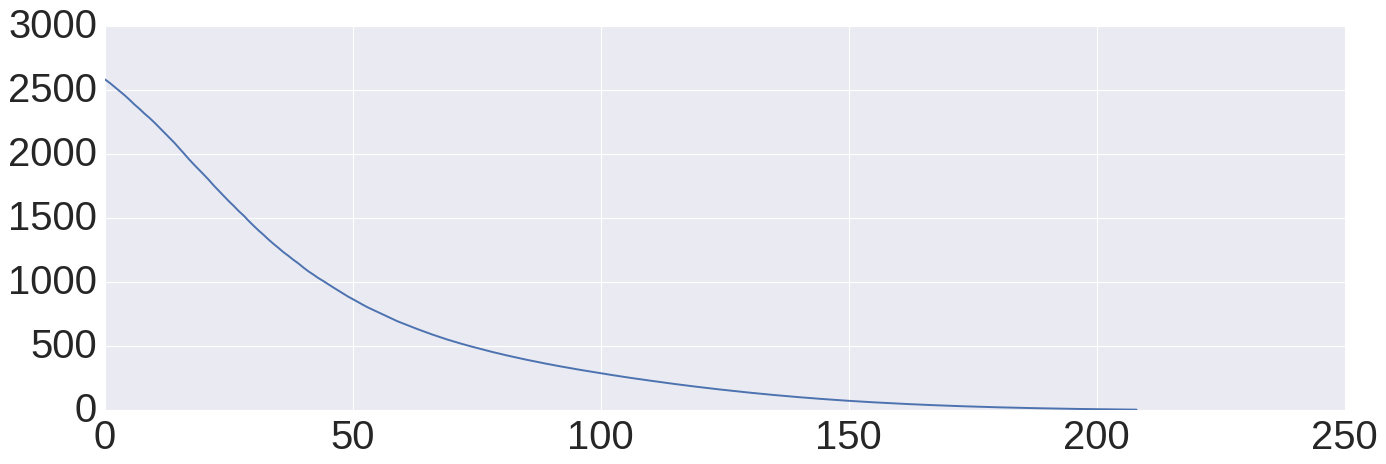

In [89]:
g3.plot(cho.dot(gp.location(p, prior=True))[100:])
#g3.plot(cho.T.dot(gp.location(p, prior=True))[100:])

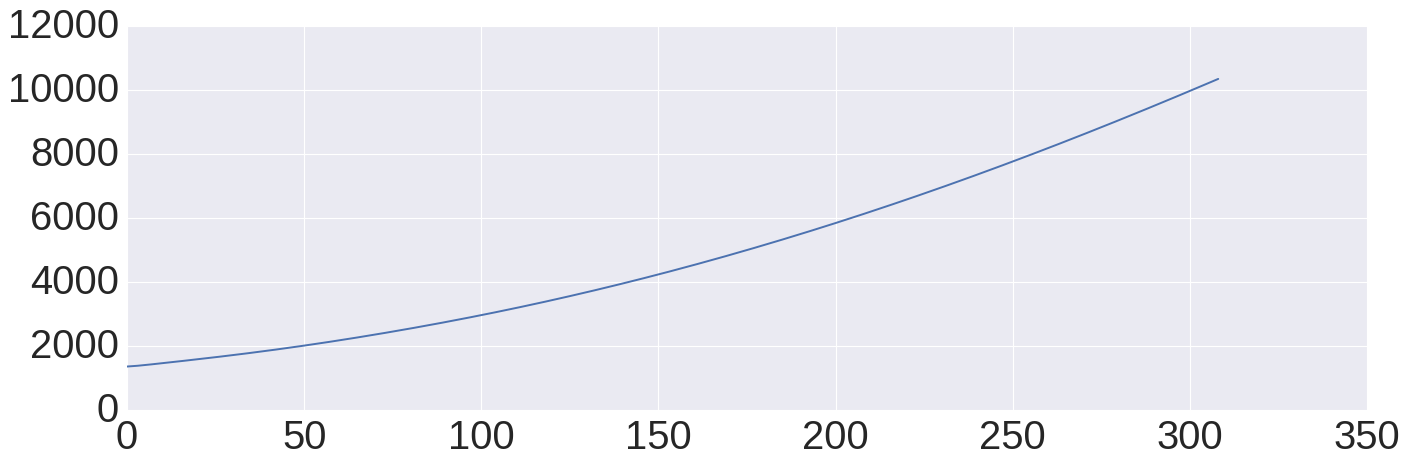

In [95]:
g3.plot(gp.location(p, prior=True).dot(cho))

In [ ]:
mp[:4]

In [ ]:
mtp[:4]

In [ ]:
gp.median(p, prior=True)

In [ ]:
tgp.median(tp, vector=np.zeros(len(tgp.space)))

In [ ]:
np.mean(np.abs((mp-mtp)/mp))

In [ ]:
tgp.widget(p, quantiles_noise=False, median=False, mean=False, samples=10, logp=True)

In [ ]:
tgp.plot(p, quantiles_noise=False, median=False, mean=False, samples=10)

In [ ]:
gp = g3.GaussianProcess(space=x, location=g3.Bias(x), kernel=g3.SE(x), hidden = y)
gp.observed(x_obs, y_obs)
gp.plot(gp.params_process(tgp,p), quantiles_noise=False, median=False, mean=False, samples=10, prior=True)

In [ ]:
gp.plot(gp.params_process(tgp,p), quantiles_noise=False, median=False, mean=False, samples=10, prior=False)